In [1]:
#import libraries and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic

colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'amount']

adult_data = pd.read_csv("data/adult.data", names=colnames, header=None)
adult_data.shape



# trim leading white spaces in dataframe
cols = adult_data.select_dtypes(['object']).columns
adult_data[cols] = adult_data[cols].apply(lambda x: x.str.strip())
adult_data = adult_data[adult_data["occupation"] != '?']

adult_data.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

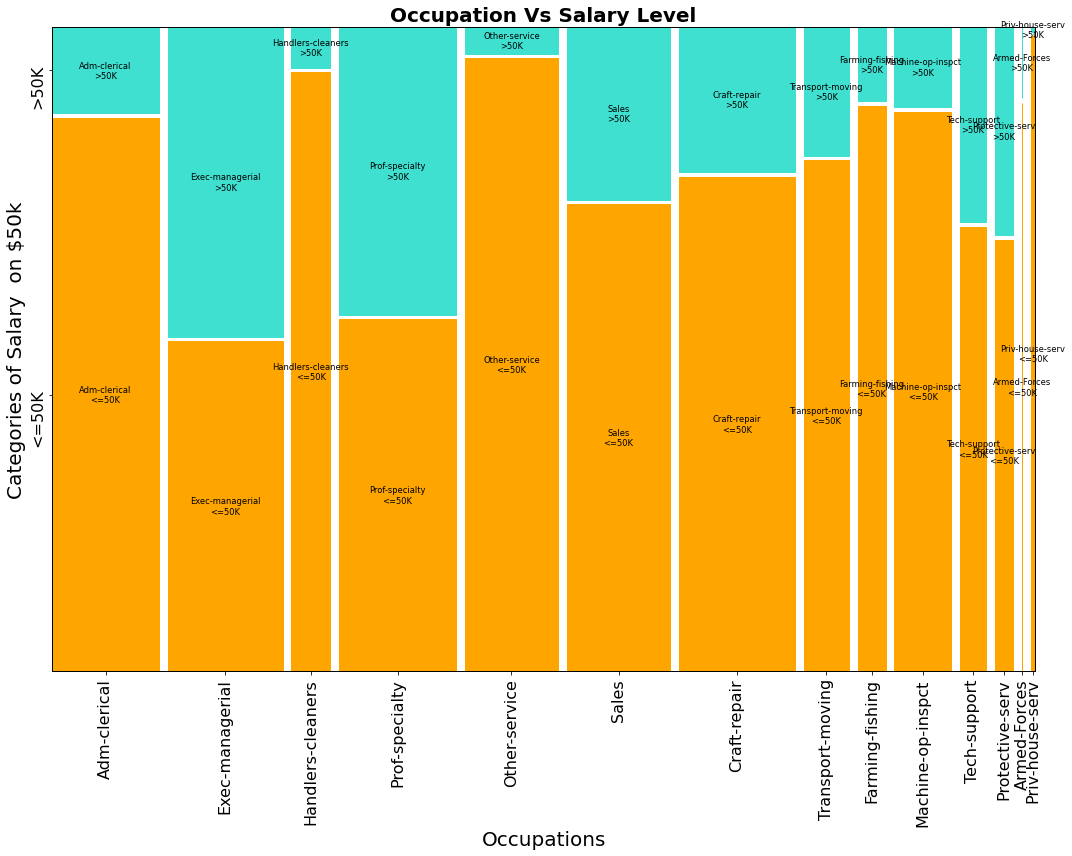

In [3]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 12))
# fig, ax = plt.subplots(figsize=(20, 15))

# props = lambda key: {'color': 'turquoise' if '<=50K' in key else 'sienna'}
props = lambda key: {'color': 'orange' if '<=50K' in key else 'turquoise'}

mosaic(adult_data, [ 'occupation',  'amount'], 
        label_rotation= 90, gap=0.01,  properties=props, ax=ax
      )

plt.axis((0,1,0,1))
ax.set_title('Occupation Vs Salary Level',fontweight="bold", size=20) # Title
ax.set_ylabel('Categories of Salary  on $50k', fontsize = 20.0) # Y label
ax.set_xlabel('Occupations', fontsize = 20) # X label
# change the fontsize
ax.tick_params(axis = 'both', which = 'major', labelsize = 16, colors='black')
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, colors='black')
plt.tight_layout()
plt.savefig('occupation_mosaic.png', bbox_inches="tight")

plt.show()

In [4]:
df = adult_data.groupby(['marital-status', "amount"])
df = df.size().unstack(fill_value=0)
df.astype(int) 

amount                 <=50K  >50K
marital-status                    
Divorced                3801   457
Married-AF-spouse         11    10
Married-civ-spouse      7818  6521
Married-spouse-absent    356    33
Never-married           9430   482
Separated                893    66
Widowed                  759    81

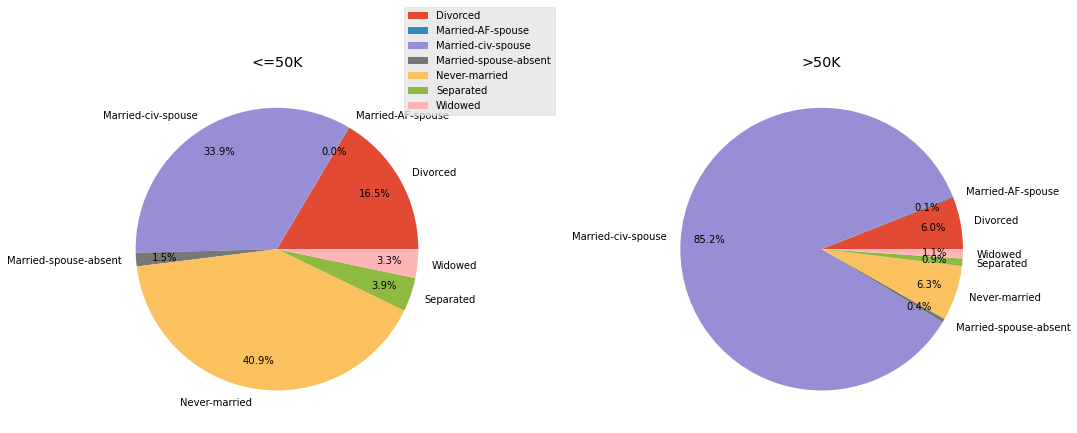

In [9]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123456)
import pandas as pd
import matplotlib
from pylab import rcParams 



plt.style.use('ggplot')
# matplotlib.cycler(color=dark2_colors)
colors = plt.rcParams['axes.prop_cycle']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

for ax, col in zip(axes.flat, df.columns):
    ax.pie(df[col], labels=df.index, startangle= 0, autopct='%1.1f%%', pctdistance=0.8)
    ax.set(ylabel='', title=col, aspect='equal')

axes[0].legend(bbox_to_anchor=(1.3, 1.2))

fig.savefig('your_file.png') # Or whichever format you'd like
plt.tight_layout()
plt.show()

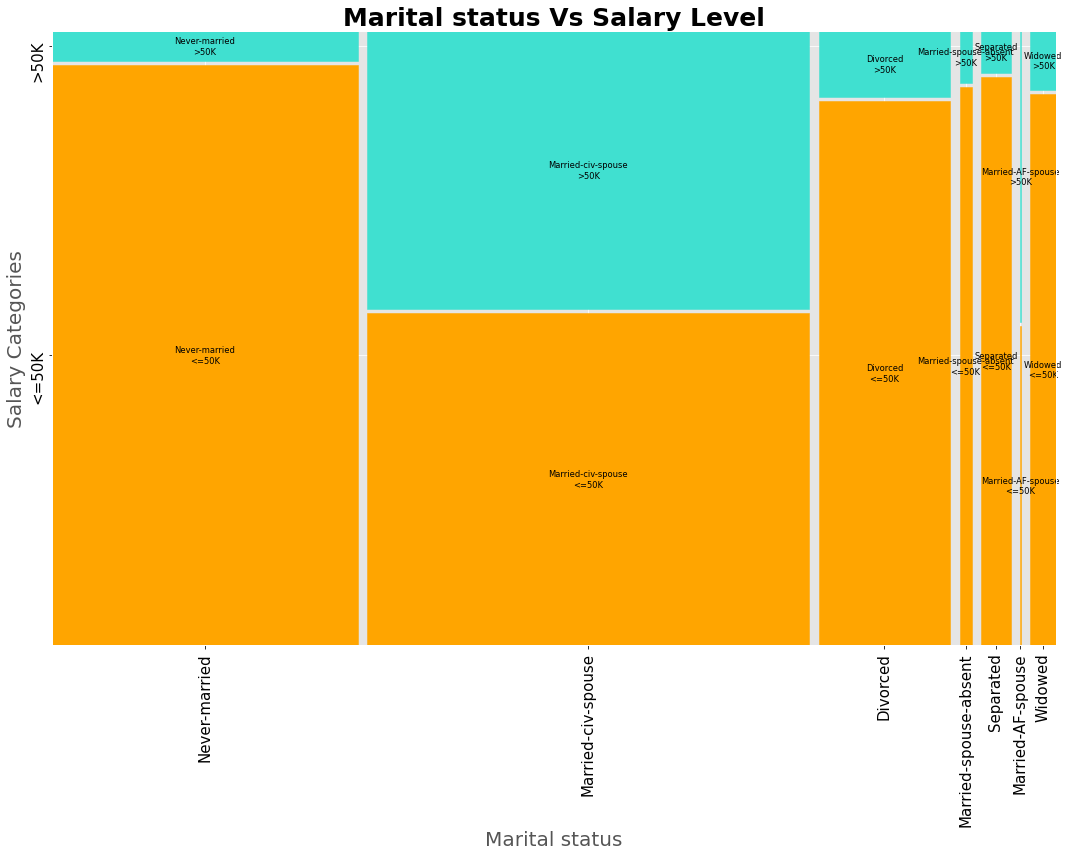

In [10]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 12))
# fig, ax = plt.subplots(figsize=(20, 15))

# props = lambda key: {'color': 'turquoise' if '<=50K' in key else 'sienna'}
props = lambda key: {'color': 'orange' if '<=50K' in key else 'turquoise'}

# labelizer=lambda k: {'' if 'separated' in key else }
# labelizer=lambda k: df.loc[k].values
labelizer = lambda key:key[0]
mosaic(adult_data, [ 'marital-status',  'amount'], 
        label_rotation= 90, gap=0.01,  properties=props, ax=ax)

plt.axis((0,1,0,1))
ax.set_title('Marital status Vs Salary Level',fontweight="bold", size=25) # Title
ax.set_ylabel('Salary Categories', fontsize = 20.0) # Y label
ax.set_xlabel('Marital status', fontsize = 20) # X label

# change the fontsize
ax.tick_params(axis = 'both', which = 'major', labelsize = 15, colors='black')
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, colors='black')
plt.tight_layout()
plt.savefig('Maritalstatus.png', bbox_inches="tight")

# plt.savefig('foo.pdf')
plt.show()